In [9]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
PRED_PATH = "/home/vblot/multiaccurate_cp/data/polyp/04_predictions/test/pred_probas"
LABEL_PATH = "/home/vblot/multiaccurate_cp/data/polyp/02_prepared_data/test/labels"

In [12]:
THS = np.linspace(0, 1, 100)
recall = []
precision = []
for th in tqdm(THS):
    recall_th = []
    precision_th = []
    for label_file in os.listdir(LABEL_PATH):
        pred = np.load(os.path.join(PRED_PATH, label_file .split(".")[0] + ".npy"))
        label = cv2.imread(os.path.join(LABEL_PATH, label_file), cv2.IMREAD_GRAYSCALE) / 255
        pred = pred > th
        recall_th.append(np.sum(pred * label) / np.sum(label))
        precision_th.append(np.sum(pred * label) / np.sum(pred))
    recall.append(np.mean(recall_th))
    precision_th = [1 if np.isnan(p) else p for p in precision_th]
    precision.append(np.mean(precision_th))

  1%|          | 1/100 [00:00<01:24,  1.18it/s]/tmp/ipykernel_3215081/1333086673.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision_th.append(np.sum(pred * label) / np.sum(pred))
100%|██████████| 100/100 [01:23<00:00,  1.19it/s]


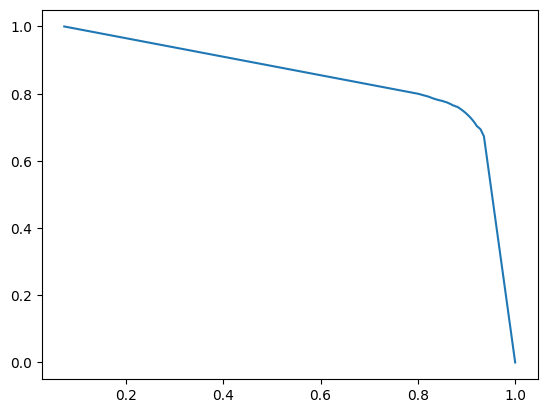

In [14]:
plt.plot(precision, recall)

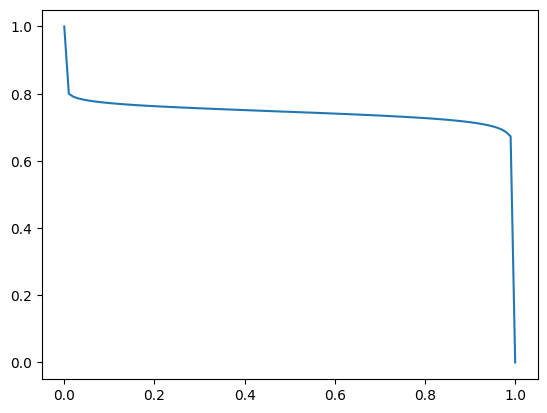

In [15]:
plt.plot(THS, recall)